Exercise 4.8 (programming) Implement value iteration for the gambler’s problem
and solve it for ph = 0.25 and ph = 0.55. In programming, you may find it convenient
to introduce two dummy states corresponding to termination with capital of 0 and
100, giving them values of 0 and 1 respectively. Show your results graphically, as in
Figure 4.3. Are your results stable as θ → 0? 

In [85]:
import numpy as np

p_h = 0.25 #0.55 #0.25

#stores the estimated values of states
v_dict = {}
v_dict[0] = 0.
v_dict[100] = 1.
for i in range(1,100):
    v_dict[i] = 0.
    
#stores the history of how v_dict updates over iterations, used for plotting
v_history_list = []
v_history_list.append([0.]*99)


theta = 0.0000000000001
for runs in range(100):
    delta = 0.
    temp_list = [] #added to v_history list every iteration, used for plotting
    
    
    #no gamma, no reward except for at states 0 (loss) and 100 (win)
    #thus value iteration is using p_h to estimate the V'(s) of a successful and unsuccessful flip
    #the actions are betting from 1 up to the current size of the stake
    
    #going through each possible state of the policy (i)
    for i in range(1,100):
        v_old = v_dict[i]
        v_best = v_dict[i] #holds the current best estimated value
        
        
        #j is each possible action, can gamble between 1 and i
        for j in range(1,i+1):
            if i + j > 100:
                bet_win = v_dict[100]
            else:
                bet_win = v_dict[i+j]
                
            if i - j < 0:
                bet_loss = v_dict[0]
            else:
                bet_loss = v_dict[i-j]
                
            v_temp = p_h * bet_win + (1.-p_h) * bet_loss
            if v_temp > v_best:
                v_best = v_temp
           
        #not tracking the policy for now (only in the last step) so old value is updated to currently found best value
        v_dict[i] = v_best
        temp_list.append(v_best)
        
        if np.abs(v_old-v_best) > delta:
            delta = np.abs(v_old-v_best)
        
    v_history_list.append(temp_list)
    #continue looping until delta is less than theta
    if delta < theta:
        break
        print(str(runs) + " " + str(delta))
    else:
        print(str(runs) + " " + str(delta))
        
#find optimal action for each state
pi_optimal = [0]*99 #optimal actions

for i in range(1,100):
    v_old = v_dict[i]
    v_best = v_dict[i] #holds the current best estimated value

    #j is each possible action, can gamble between 1 and i
    for j in range(1,i+1):
        if i + j > 100:
            bet_win = v_dict[100]
        else:
            bet_win = v_dict[i+j]

        if i - j < 0:
            bet_loss = v_dict[0]
        else:
            bet_loss = v_dict[i-j]

        v_temp = p_h * bet_win + (1.-p_h) * bet_loss
        if v_temp >= v_best:
            pi_optimal[i-1] = j

0 0.822021484375
1 0.190673828125
2 0.042724609375
3 0.0106811523438
4 0.00267028808594
5 0.000667572021484
6 0.000115871429443
7 2.17258930206e-05
8 5.43147325516e-06
9 1.35786831379e-06
10 3.39467078447e-07
11 3.580316843e-08
12 6.71309408062e-09
13 5.31016230987e-10
14 1.32754057747e-10
15 3.31885144367e-11
16 6.2228460232e-12
17 1.16678368356e-12
18 2.9169592089e-13


In [79]:
#print(v_dict)
#print(v_history_list)
#print(pi_optimal)
#print(pi_optimal[49])


## p_h = .55 solution plots

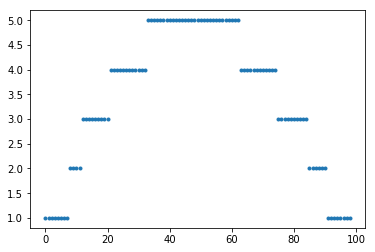

In [80]:
import matplotlib.pyplot as plt

plt.plot(pi_optimal,'.')
plt.show()

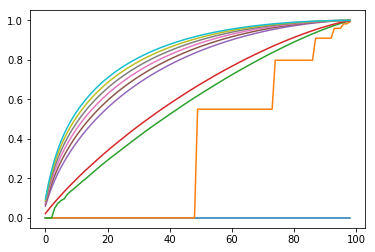

In [81]:
import matplotlib.pyplot as plt

plt.plot(v_history_list[0])
plt.plot(v_history_list[1])
plt.plot(v_history_list[5])
plt.plot(v_history_list[10])
plt.plot(v_history_list[int(len(v_history_list)*.5)])
plt.plot(v_history_list[int(len(v_history_list)*.6)])
plt.plot(v_history_list[int(len(v_history_list)*.7)])
plt.plot(v_history_list[int(len(v_history_list)*.8)])
plt.plot(v_history_list[int(len(v_history_list)*.9)])
plt.plot(v_history_list[len(v_history_list)-1])
plt.show()

## 0.25 = p_h Solution Plots

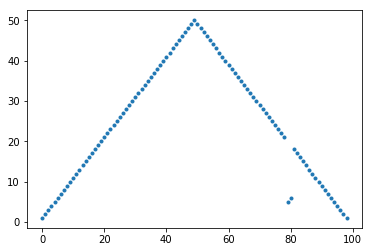

In [83]:
import matplotlib.pyplot as plt

plt.plot(pi_optimal,'.')
plt.show()

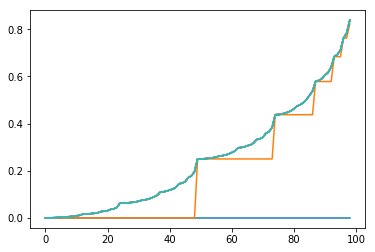

In [84]:
plt.plot(v_history_list[0])
plt.plot(v_history_list[1])
plt.plot(v_history_list[5])
plt.plot(v_history_list[10])
plt.plot(v_history_list[int(len(v_history_list)*.5)])
plt.plot(v_history_list[int(len(v_history_list)*.6)])
plt.plot(v_history_list[int(len(v_history_list)*.7)])
plt.plot(v_history_list[int(len(v_history_list)*.8)])
plt.plot(v_history_list[int(len(v_history_list)*.9)])
plt.plot(v_history_list[len(v_history_list)-1])
plt.show()

I believe it's stable as theta approaches 0. The print out above (and the one for 0.55) for the change in delta for subsequent runs shows that delta is continually decreasing.

### Exercise 4.4 (programming) 
Write a program for policy iteration and re-solve
Jack’s car rental problem with the following changes. One of Jack’s employees at the
first location rides a bus home each night and lives near the second location. She
is happy to shuttle one car to the second location for free. Each additional car still
costs 2, as do all cars moved in the other direction. In addition, Jack has limited
parking space at each location. If more than 10 cars are kept overnight at a location
(after any moving of cars), then an additional cost of 4 must be incurred to use
a second parking lot (independent of how many cars are kept there). These sorts
of nonlinearities and arbitrary dynamics often occur in real problems and cannot
easily be handled by optimization methods other than dynamic programming. To
check your program, first replicate the results given for the original problem. If your
computer is too slow for the full problem, cut all the numbers of cars in half. 

In [1]:
#my computer runs this too slow to do this
#only recreated the original program and didn't try the added dynamics
#this isn't checked as I can't manage to do the entire 20 car problem
#to do the additional program, would modify move calculation below, which is relatively straight forward

import numpy as np

max_cars = 5 #10 #computer too slow


def poisson_prob(n, l):
    return np.math.pow(l,n) / np.math.factorial(n) * np.exp(-l)

def move_calculation(lot_1,lot_2,cars):
    
    #can't move more cars than are in the lot
    if cars < 0 and np.abs(cars) > lot_1:
        cars = lot_1
    elif cars > 0 and cars > lot_2:
        cars = lot_2
    
    lot_1 = lot_1 - cars #negative cars is moving cars from 2 to 1
    lot_2 = lot_2 + cars
    
    if lot_1 < 0:
        lot_1 = 0
    elif lot_1 > max_cars:
        lot_1 = max_cars
        
    if lot_2 < 0:
        lot_2 = 0
    elif lot_2 > max_cars:
        lot_2 = max_cars
        
    cost = cars * -2.
    
    return lot_1,lot_2,cost

def get_next_state(lot_1,lot_2,rentals_1,rentals_2,returns_1,returns_2):
    lot_1 = lot_1 - rentals_1 + returns_1
    lot_2 = lot_2 - rentals_2 + returns_2
    
    if lot_1 < 0:
        lot_1 = 0
    elif lot_1 > max_cars:
        lot_1 = max_cars
        
    if lot_2 < 0:
        lot_2 = 0
    elif lot_2 > max_cars:
        lot_2 = max_cars
        
    return lot_1, lot_2

#state space is 0-20 cars for each lot
lot_state_value = {}

for i in range(max_cars+1):
    for j in range(max_cars+1):
        lot_state_value[(i,j)] = 0

    
theta = 0.01
gamma = 0.9 #discount rate

for runs in range(100):
    delta = 0.
    
    for i in range(max_cars+1):
        for j in range(max_cars+1):
            v_old = lot_state_value[(i,j)]
            v_best = lot_state_value[(i,j)]
            #print("test1" +str(i) +str(j))
            #cycle through the possible actions, the best one is used to update to get the new best state
            for move_car in range(-5,6):
                lot_1,lot_2,cost = move_calculation(i,j,move_car)
                #print("test2")
                
                #calculating value of state
                #cost is fixed and happens 100% of the time,
                v_new = cost
            
                #lot 1 possible rewards
                for rentals_1 in range(0,lot_1+1):
                    for rentals_2 in range(0,lot_2+1):
                        for returns_1 in range(0,max_cars+1): #can technically get more returns I guess but whatever
                            for returns_2 in range(0,max_cars+1): #can technically get more returns I guess but whatever
                                lot_1_cars,lot_2_cars = get_next_state(lot_1,lot_2,rentals_1,rentals_2,returns_1,returns_2)
                                next_state = lot_state_value[(lot_1_cars,lot_2_cars)]
                                v_new += poisson_prob(rentals_1,3)*poisson_prob(returns_1,3) \
                                    *poisson_prob(rentals_2,4)*poisson_prob(returns_1,2) \
                                    *(rentals_1*10. + rentals_2*10. + np.math.pow(gamma,runs) * next_state )

                if v_new > v_best:
                    v_best = v_new    
                 
            lot_state_value[(i,j)] = v_best
            if delta < np.abs(v_old-v_best):
                delta = np.abs(v_old-v_best)
            
            
    print(str(runs) + " " + str(delta))
    if delta < theta:
        break



0 56.1208312193
1 11.492430662
2 0.829526801415
3 0.0


In [2]:
print(lot_state_value)

{(1, 2): 3.4313259982092585, (3, 2): 8.2488028085409706, (0, 0): 0.0099838663035239639, (5, 0): 10.813214463078301, (3, 0): 6.8084838140149078, (0, 4): 1.3444716025881496, (5, 4): 52.627796338587352, (1, 4): 11.819183944548483, (5, 5): 66.111827650134245, (1, 3): 6.5811894376110267, (0, 5): 1.9237349148267737, (2, 1): 4.6362265706279482, (5, 1): 10.813509585727434, (4, 2): 15.355659195830942, (2, 5): 30.234845253996212, (1, 0): 2.2174179705010375, (3, 5): 41.459074265056799, (0, 1): 0.089718805681961292, (5, 3): 37.951645793190409, (4, 1): 8.8091727930949482, (0, 2): 0.33203141636034927, (3, 3): 17.332822761616487, (1, 5): 18.22404346808921, (3, 4): 28.264894808378859, (3, 1): 6.8084912212862925, (5, 2): 24.771922204661156, (4, 4): 39.486377278059514, (1, 1): 2.2174196522166474, (2, 0): 4.6362200414113408, (4, 3): 26.297988411360418, (2, 2): 4.6547357176159565, (4, 5): 53.861160617206181, (2, 3): 10.239502389786331, (4, 0): 8.8091674246751719, (0, 3): 0.77295671337185679, (2, 4): 19.31